## Task 5 for GRIP - TSF

### Exploratory Data Analysis - Sports

● Perform ‘Exploratory Data Analysis’ on dataset ‘Indian Premier League’ 

● As a sports analysts, find out the most successful teams, players and factors contributing win or loss of a team. 

● Suggest teams or players a company should endorse for its products. 


### Done By
>Prakriti Sharma for GRIPMAY21

##### Dataset link: https://bit.ly/34SRn3b

### Importing Libraries

In [378]:
#Importing libraries
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn import datasets
from sklearn import metrics

import time
import matplotlib
import matplotlib.cm as cm
import altair as alt
import os
from tkinter import *
from tkinter import ttk
from tkinter import messagebox
import tkinter as tk
from PIL import ImageTk
import PIL.Image
import gc
import re

from wordcloud import WordCloud

In [355]:
mdf = pd.read_csv('matches.csv')
mdf.head()

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,2017,Indore,2017-04-08,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN


In [356]:
ddf = pd.read_csv('deliveries.csv')
ddf.head()

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,2,2,NaN,NaN,NaN


### Data Cleaning

In [357]:
#Data Cleaning
ddf.dropna(axis=0, how='any',inplace=True)
mdf.dropna(axis=0, how='any',inplace=True)

### Exploratory Data Analysis

In [358]:
ddf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6448 entries, 11 to 179075
Data columns (total 21 columns):
match_id            6448 non-null int64
inning              6448 non-null int64
batting_team        6448 non-null object
bowling_team        6448 non-null object
over                6448 non-null int64
ball                6448 non-null int64
batsman             6448 non-null object
non_striker         6448 non-null object
bowler              6448 non-null object
is_super_over       6448 non-null int64
wide_runs           6448 non-null int64
bye_runs            6448 non-null int64
legbye_runs         6448 non-null int64
noball_runs         6448 non-null int64
penalty_runs        6448 non-null int64
batsman_runs        6448 non-null int64
extra_runs          6448 non-null int64
total_runs          6448 non-null int64
player_dismissed    6448 non-null object
dismissal_kind      6448 non-null object
fielder             6448 non-null object
dtypes: int64(13), object(8)
memory usage:

In [359]:
mdf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 118 entries, 636 to 755
Data columns (total 18 columns):
id                 118 non-null int64
season             118 non-null int64
city               118 non-null object
date               118 non-null object
team1              118 non-null object
team2              118 non-null object
toss_winner        118 non-null object
toss_decision      118 non-null object
result             118 non-null object
dl_applied         118 non-null int64
winner             118 non-null object
win_by_runs        118 non-null int64
win_by_wickets     118 non-null int64
player_of_match    118 non-null object
venue              118 non-null object
umpire1            118 non-null object
umpire2            118 non-null object
umpire3            118 non-null object
dtypes: int64(5), object(13)
memory usage: 17.5+ KB


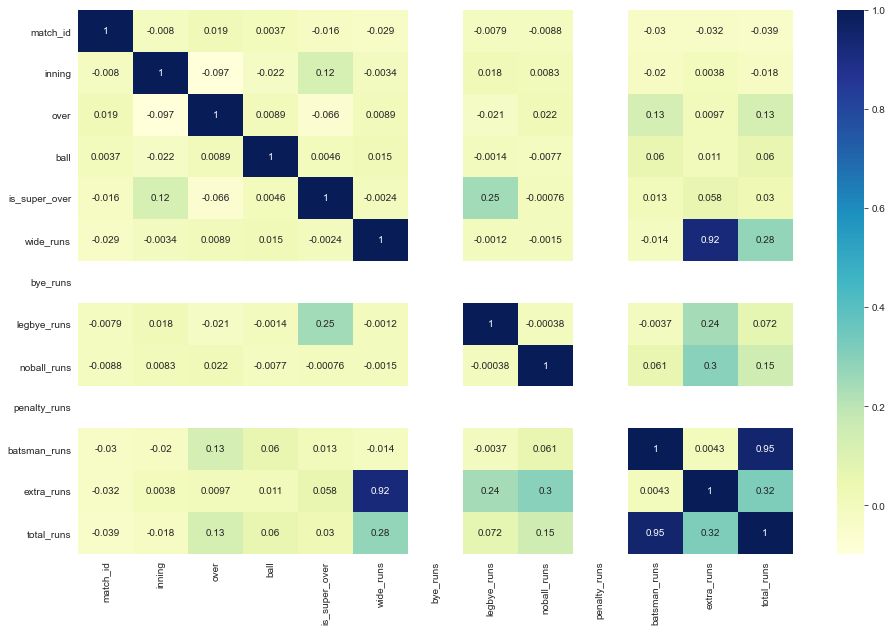

In [360]:
plt.figure(figsize = (16, 10))
sns.heatmap(ddf.corr(), annot = True, cmap="YlGnBu")
plt.show()

Here, we can see that features 'bye_runs' and 'penalty_runs' have no correlation with any of the features (hence, the discoloured area). So we delete these two features in the next statement.

In [361]:
ddf = ddf.drop(['bye_runs','penalty_runs'], axis = 1)

##### Since both the dataframes have a common column for match_id, we merge both dataframes on that column.

In [362]:
#merging both the dataframes
df = pd.merge(mdf, ddf, left_on='id', right_on='match_id')

In [363]:
#finding which player won the 'Player of Match' title, how many times.
pom = pd.DataFrame(mdf.player_of_match.value_counts())

In [364]:
#checking for null values
df.isnull().any()

id                  False
season              False
city                False
date                False
team1               False
team2               False
toss_winner         False
toss_decision       False
result              False
dl_applied          False
winner              False
win_by_runs         False
win_by_wickets      False
player_of_match     False
venue               False
umpire1             False
umpire2             False
umpire3             False
match_id            False
inning              False
batting_team        False
bowling_team        False
over                False
ball                False
batsman             False
non_striker         False
bowler              False
is_super_over       False
wide_runs           False
legbye_runs         False
noball_runs         False
batsman_runs        False
extra_runs          False
total_runs          False
player_dismissed    False
dismissal_kind      False
fielder             False
dtype: bool

##### Checking for categorical data variables, for further analysis.

In [365]:
mdf.season.value_counts()

2018    60
2019    58
Name: season, dtype: int64

In [366]:
mdf.result.value_counts()

normal    116
tie         2
Name: result, dtype: int64

In [367]:
mdf.dl_applied.value_counts()

0    115
1      3
Name: dl_applied, dtype: int64

In [368]:
mdf.toss_winner.value_counts()

Chennai Super Kings            23
Rajasthan Royals               16
Kolkata Knight Riders          14
Kings XI Punjab                13
Mumbai Indians                 13
Sunrisers Hyderabad            11
Royal Challengers Bangalore    11
Delhi Capitals                  9
Delhi Daredevils                8
Name: toss_winner, dtype: int64

In [369]:
mdf.toss_decision.value_counts()

field    98
bat      20
Name: toss_decision, dtype: int64

In [370]:
mdf['toss'] = mdf['toss_winner']==mdf['winner']
mdf.toss.value_counts()

True     67
False    51
Name: toss, dtype: int64

## Most Successful Teams

In [371]:
###most successful teams
def team():
    plt.figure(figsize=(10,10))
    plt.xticks([5,8,11,14,17,21])
    ax = sns.countplot(y='winner', data=mdf, orient='h', palette = 'plasma',order=mdf.winner.value_counts().index)
    plt.xlabel('Wins', weight = 'bold', fontsize = 13)
    plt.title ("Number of matches won Team-wise", fontsize = 15, weight = 'bold')
    plt.ylabel('Teams', weight = 'bold', fontsize = 13)
    mng = plt.get_current_fig_manager()
    plt.show(block=False)
    mng.full_screen_toggle()
    plt.tight_layout()
    plt.show(block=False)
    plt.pause(5)
    plt.close()

## Best Players

In [372]:
### best players
pom = pom.loc[pom['player_of_match'] > 2]
def play():    
    x = list(pom.index)
    y = list(pom['player_of_match'])

    plt.figure(figsize = (16,5))
    sns.barplot(x,y, palette = 'rainbow')
    mng = plt.get_current_fig_manager()
    mng.full_screen_toggle()
    plt.tight_layout()
    plt.show(block=False)
    plt.pause(5)
    plt.close()

## Factors contributing to win

In [373]:
def fact():
    #factor1
    plt.figure(figsize = (16, 10))
    sns.heatmap(ddf.corr(), annot = True, cmap="Blues")
    plt.title("Correlation of all features in deliveries.csv", weight = 'bold', fontsize = 16)
    mng = plt.get_current_fig_manager()
    mng.full_screen_toggle()
    plt.tight_layout()
    plt.show(block=False)
    plt.pause(5)
    plt.close()
    
    ###factors 2
    plt.figure(figsize=(6,6))
    space = [0.1,0.12]
    mdf['toss'].value_counts().plot(kind='pie', explode=space, fontsize=10,autopct='%1.1f%%', colors = ['skyblue', 'salmon'])
    plt.ylabel('')
    plt.title('Team that Won the Toss wins the match', weight = 'bold', fontsize=15)
    mng = plt.get_current_fig_manager()
    mng.full_screen_toggle()
    plt.tight_layout()
    plt.show(block=False)
    plt.pause(5)
    plt.close()
    
    ###factor 3
    x = mdf.loc[mdf['toss_decision'] == 'field']
    plt.figure(figsize=(6,6))
    space = [0.1,0.12]
    x['toss'].value_counts().plot(kind='pie', explode=space, fontsize=10,autopct='%1.1f%%', colors = ['purple', 'yellow'])
    plt.ylabel('')
    plt.title('Team that Won the Toss and chose to field, won', weight = 'bold', fontsize=15)
    mng = plt.get_current_fig_manager()
    mng.full_screen_toggle()
    plt.tight_layout()
    plt.show(block=False)
    plt.pause(5)
    plt.close()
    
    ###factor 4
    x = mdf.loc[mdf['toss_decision'] == 'bat']
    plt.figure(figsize=(6,6))
    space = [0.1,0.12]
    x['toss'].value_counts().plot(kind='pie', explode=space, fontsize=10,autopct='%1.1f%%', colors = ['cyan', 'red'])
    plt.ylabel('')
    plt.title('Team that Won the Toss and chose to bat, won', weight = 'bold', fontsize=15)
    mng = plt.get_current_fig_manager()
    mng.full_screen_toggle()
    plt.tight_layout()
    plt.show(block=False)
    plt.pause(5)
    plt.close()
    
    ###factor 5
    plt.figure(figsize=(10,6))
    mdf['city'].value_counts().plot(kind='bar', fontsize=10, cmap = 'Set2')
    plt.xticks(rotation = 15)
    plt.xlabel('')
    plt.ylabel('Total Wins', weight = 'bold')
    plt.title('Depending on cities the matches were played in', weight = 'bold', fontsize=15)
    mng = plt.get_current_fig_manager()
    mng.full_screen_toggle()
    plt.tight_layout()
    plt.show(block=False)
    plt.pause(5)
    plt.close()

### Team Analysis

In [374]:
def study():
    ###analysis1
    plt.figure(figsize=(10,6))
    plt.bar(df['over'], df['batsman_runs'], color = 'maroon')
    plt.xticks(rotation = 15)
    plt.ylabel('Batsman runs')
    plt.title('Overs vs Batsman Runs', weight = 'bold', fontsize=15)
    mng = plt.get_current_fig_manager()
    mng.full_screen_toggle()
    plt.tight_layout()
    plt.show(block=False)
    plt.pause(5)
    plt.close()
    
    ###analysis2
    plt.figure(figsize=(16,6))
    plt.bar(df['batting_team'], df['batsman_runs'], color = 'deepskyblue')
    plt.xticks(rotation = 15)
    plt.ylabel('Batsman runs')
    plt.title('Batting Team vs Batsman Runs', weight = 'bold', fontsize=15)
    mng = plt.get_current_fig_manager()
    mng.full_screen_toggle()
    plt.tight_layout()
    plt.show(block=False)
    plt.pause(5)
    plt.close()
    
    ###analysis3
    plt.figure(figsize=(16,6))
    plt.bar(df['bowling_team'], df['player_dismissed'].count(), color = 'darkgreen')
    plt.xticks(rotation = 15)
    plt.ylabel('Players Dismissed')
    plt.yticks([800,900,1000,1100,1200])
    plt.title('Bowling Team vs Player Dismissed', weight = 'bold', fontsize=15)
    mng = plt.get_current_fig_manager()
    mng.full_screen_toggle()
    plt.tight_layout()
    plt.show(block=False)
    plt.pause(5)
    plt.close()
    
    ###analysis4
    plt.figure(figsize=(16,6))
    plt.bar(df['bowling_team'], df['batsman_runs'], color = 'blueviolet')
    plt.xticks(rotation = 15)
    plt.ylabel('Batsman runs')
    plt.title('Bowling Team vs Batsman Runs', weight = 'bold', fontsize=15)
    mng = plt.get_current_fig_manager()
    mng.full_screen_toggle()
    plt.tight_layout()
    plt.show(block=False)
    plt.pause(5)
    plt.close()

### Designing the Dashboard

In [380]:
def center(win):
    """
    centers a tkinter window
    :param win: the root or Toplevel window to center
    """
    win.update_idletasks()
    width = win.winfo_width()
    frm_width = win.winfo_rootx() - win.winfo_x()
    win_width = width + 2 * frm_width
    height = win.winfo_height()
    titlebar_height = win.winfo_rooty() - win.winfo_y()
    win_height = height + titlebar_height + frm_width
    x = win.winfo_screenwidth() // 2 - win_width // 2
    y = win.winfo_screenheight() // 2 - win_height // 2
    win.geometry('{}x{}+{}+{}'.format(width, height, x, y))
    win.deiconify()

path=""
lang=""

def execute():
    global path
    global lang
    #global data
    root.geometry("900x650")
    root.title("IPL Data Dashboard")
    root.configure(background="#FEE12B")
    root.geometry("+300+15")
    
    lab = Label(root, text = "Welcome to IPL Data Dashboard!", font = ('Veranda',20, 'bold'), borderwidth = 4,bg="#FEE12B", fg = "darkblue").grid(row = 0, column = 0)

    #Button for PLOT1
    fp1 = open("plot4.png","rb")
    img1=PIL.Image.open(fp1)
    img1 = img1.resize((120,120))
    imgbtn1 = ImageTk.PhotoImage(img1)
    lab1 = Label(root, text = 'Best Team', bg = "salmon", font = ('Veranda', 9), borderwidth = 2).grid(row = 1, column = 0)
    b1 = Button(root, image = imgbtn1, compound = TOP, bg = "black",command=team)
    b1.image = imgbtn1
    b1.grid(row=2,column=0, pady = 20, padx = 20)

    #Button for PLOT2
    fp2 = open(r"plot5.png","rb")
    img2=PIL.Image.open(fp2)
    img2 = img2.resize((120,120))
    imgbtn2 = ImageTk.PhotoImage(img2)
    lab2 = Label(root, text = 'Best Players', bg = "salmon", font = ('Veranda', 9), borderwidth = 2).grid(row = 1, column = 1)
    b2 = Button(root, image = imgbtn2, compound = TOP, bg = "black",command=play)
    b2.image = imgbtn2
    b2.grid(row=2,column=1, pady = 20, padx = 20)

    #Button for PLOT3
    fp4= open(r"plot6.png","rb")
    img4=PIL.Image.open(fp4)
    img4 = img4.resize((120,120))
    imgbtn4 = ImageTk.PhotoImage(img4)
    lab4 = Label(root, text = "Factors for win", bg = "salmon", font = ('Veranda', 9), borderwidth = 2).grid(row = 3, column = 0)
    b4 = Button(root, image = imgbtn4, compound = TOP, bg = "black",command=fact)
    b4.image = imgbtn4
    b4.grid(row=4,column=0, pady = 20, padx = 20)

    #Button for PLOT4
    fp3= open(r"plot6_1.png","rb")
    img3=PIL.Image.open(fp3)
    img3 = img3.resize((120,120))
    imgbtn3 = ImageTk.PhotoImage(img3)
    lab3 = Label(root, text = 'Team Analysis', bg = "salmon", font = ('Veranda', 9), borderwidth = 2, padx = 10).grid(row = 3, column = 1)
    b3 = Button(root, image = imgbtn3, compound = TOP, bg = "black",command=study)
    b3.image = imgbtn3
    b3.grid(row=4,column=1, pady = 20, padx = 20)

from tkinter import Tk, Button, Entry, Label
root = Tk()
execute()
root.mainloop()

TclError: image "pyimage2" doesn't exist